# Dados históricos - INMet
Estação de Porto Alegre (cód. A801) 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
# Função para reorganizar os dados
# Retorna precipitação acumulada diária
def reorganiza(file):
    file = pd.read_excel(file)    
    data_inicial = file['DATA (YYYY-MM-DD)'].min()
    data_final = file['DATA (YYYY-MM-DD)'].max() + timedelta(hours=24)
    file = pd.DataFrame(file).astype(str)
    file = file.replace({',': '.'}, regex=True)
    file = file.iloc[::, 2:].astype(float)
    index = pd.date_range(start=data_inicial, end=data_final, freq='h')
    index = [data.strftime('%Y-%m-%d %H:%M:%S') for data in index]
    del index[-1]
    file['index'] = [datetime.strptime(data,
                                       '%Y-%m-%d %H:%M:%S') for data in index] 
    file = file.set_index('index')
    file = file.drop(file.iloc[::,1:], axis='columns')
    file = file.replace(-9999, float('NaN'))
    file = file.resample('d').sum()
    return file 

In [3]:
# Ler o arquivo de cada ano e concatenar em um unico dataframe 
path = "C:\\ENS\\Hidrologia\\Dados_INMet"
dados = pd.DataFrame() 

for i in range(2000, 2016):
    file = path + '\\' + str(i) + '.xlsx'
    aux = reorganiza(file)
    dados = pd.concat([dados, aux])
dados 

,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"
index,
2000-09-22,0.0
2000-09-23,28.0
2000-09-24,23.8
2000-09-25,0.0
2000-09-26,0.0
...,...
2015-12-27,0.0
2015-12-28,0.0
2015-12-29,0.0


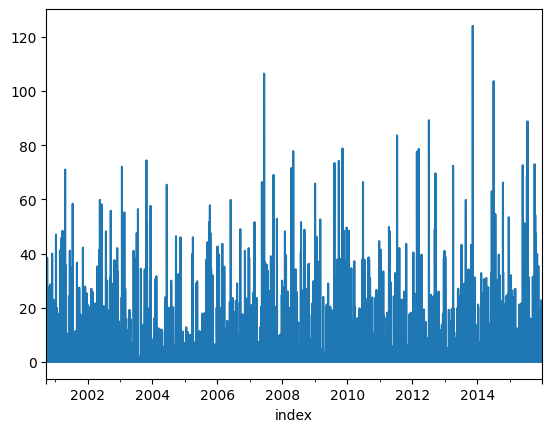

In [4]:
dados['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].plot() 
dados.to_excel(path+'\\dados.xlsx')